In [1]:
## Fraud detection data cleaning for inpatient data
import numpy as np
import pandas as pd 
import re
import matplotlib.pyplot as plt
import random
%matplotlib inline

In [2]:
ip_train_df = pd.read_csv('Train_Inpatientdata-1542865627584.csv',na_values=[''])
ip_test_df = pd.read_csv('Test_Inpatientdata-1542969243754.csv',na_values=[''])

In [3]:
print(ip_train_df.shape)
ip_train_df.head(10)

(40474, 30)


,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,...,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,...,NaN,NaN,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,...,25062,40390,4019,NaN,331.0,NaN,NaN,NaN,NaN,NaN
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,NaN,2009-08-13,...,5119,29620,20300,NaN,3893.0,NaN,NaN,NaN,NaN,NaN
5,BENE11017,CLM70950,2009-10-06,2009-10-12,PRV54986,8000,PHY402711,PHY402711,PHY402711,2009-10-06,...,2948,25000,25002,NaN,863.0,NaN,NaN,NaN,NaN,NaN
6,BENE11018,CLM32075,2009-01-02,2009-01-07,PRV54090,8000,PHY412314,PHY347494,NaN,2009-01-02,...,2948,2809,56210,NaN,4576.0,NaN,NaN,NaN,NaN,NaN
7,BENE11028,CLM62376,2009-08-03,2009-08-07,PRV51148,6000,PHY346286,PHY405514,NaN,2009-08-03,...,2851,4439,41401,NaN,9904.0,NaN,NaN,NaN,NaN,NaN
8,BENE11031,CLM62784,2009-08-06,2009-08-09,PRV55839,7000,PHY385030,NaN,NaN,2009-08-06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,BENE11034,CLM31519,2008-12-29,2009-01-05,PRV55215,29000,PHY355604,PHY415867,NaN,2008-12-29,...,4019,4111,4589,NaN,3612.0,4139.0,NaN,NaN,NaN,NaN


In [4]:
print(ip_test_df.shape)
ip_test_df.head(10)

(9551, 30)


,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
0,BENE11014,CLM67387,2009-09-09,2009-09-16,PRV57070,9000,PHY317786,PHY427017,NaN,2009-09-09,...,5990,570,41071,4280,4443.0,5849.0,NaN,NaN,NaN,NaN
1,BENE11017,CLM31237,2008-12-25,2009-01-08,PRV54750,14000,PHY314656,PHY426644,NaN,2008-12-25,...,4549,29570,34831,NaN,5551.0,NaN,NaN,NaN,NaN,NaN
2,BENE11026,CLM78930,2009-12-09,2009-12-13,PRV53758,2000,PHY349495,NaN,NaN,2009-12-09,...,78650,7813,4254,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BENE11031,CLM56810,2009-06-23,2009-07-06,PRV55825,16000,PHY429538,PHY371893,NaN,2009-06-23,...,4254,41400,5849,41401,8152.0,3320.0,NaN,NaN,NaN,NaN
4,BENE11085,CLM34625,2009-01-20,2009-01-31,PRV52338,19000,PHY397161,NaN,NaN,2009-01-20,...,V6109,7242,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,BENE11090,CLM56552,2009-06-21,2009-06-22,PRV55544,1000,PHY405478,NaN,NaN,2009-06-21,...,34590,4254,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,BENE11099,CLM52386,2009-05-23,2009-05-26,PRV53275,3000,PHY425441,NaN,NaN,2009-05-23,...,34690,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,BENE11127,CLM55284,2009-06-12,2009-06-23,PRV54989,4000,PHY357865,NaN,NaN,2009-06-12,...,25000,4280,32723,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,BENE11176,CLM55569,2009-06-14,2009-06-14,PRV57214,15000,PHY405200,PHY432053,NaN,2009-06-14,...,2760,486,99591,5856,4513.0,NaN,NaN,NaN,NaN,NaN
9,BENE11218,CLM65115,2009-08-24,2009-08-31,PRV52117,19000,PHY335369,PHY344060,NaN,2009-08-24,...,78720,49121,V850,NaN,9671.0,NaN,NaN,NaN,NaN,NaN


In [5]:
ip_df = pd.concat([ip_train_df,ip_test_df], axis=0).reset_index(drop = True)

In [6]:
print(ip_df.shape)
ip_df[40470:40480]

(50025, 30)


,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
40470,BENE159175,CLM74504,2009-11-03,2009-11-06,PRV54981,4000,PHY342806,PHY365497,NaN,2009-11-03,...,49122,4254,5990,NaN,8605.0,NaN,NaN,NaN,NaN,NaN
40471,BENE159177,CLM76485,2009-11-18,2009-11-22,PRV56588,3000,PHY423220,PHY332752,NaN,2009-11-18,...,71534,71590,V4502,NaN,9390.0,NaN,NaN,NaN,NaN,NaN
40472,BENE159177,CLM79949,2009-12-17,2009-12-18,PRV56575,5000,PHY353156,NaN,NaN,2009-12-17,...,4263,0414,41400,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40473,BENE159188,CLM69948,2009-09-28,2009-10-06,PRV54765,15000,PHY431177,PHY352941,NaN,2009-09-28,...,4019,2800,27801,NaN,1733.0,NaN,NaN,NaN,NaN,NaN
40474,BENE11014,CLM67387,2009-09-09,2009-09-16,PRV57070,9000,PHY317786,PHY427017,NaN,2009-09-09,...,5990,570,41071,4280,4443.0,5849.0,NaN,NaN,NaN,NaN
40475,BENE11017,CLM31237,2008-12-25,2009-01-08,PRV54750,14000,PHY314656,PHY426644,NaN,2008-12-25,...,4549,29570,34831,NaN,5551.0,NaN,NaN,NaN,NaN,NaN
40476,BENE11026,CLM78930,2009-12-09,2009-12-13,PRV53758,2000,PHY349495,NaN,NaN,2009-12-09,...,78650,7813,4254,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40477,BENE11031,CLM56810,2009-06-23,2009-07-06,PRV55825,16000,PHY429538,PHY371893,NaN,2009-06-23,...,4254,41400,5849,41401,8152.0,3320.0,NaN,NaN,NaN,NaN
40478,BENE11085,CLM34625,2009-01-20,2009-01-31,PRV52338,19000,PHY397161,NaN,NaN,2009-01-20,...,V6109,7242,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40479,BENE11090,CLM56552,2009-06-21,2009-06-22,PRV55544,1000,PHY405478,NaN,NaN,2009-06-21,...,34590,4254,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
ip_df[['DeductibleAmtPaid']] # Deductible looks the same for all claims 

,DeductibleAmtPaid
0,1068.0
1,1068.0
2,1068.0
3,1068.0
4,1068.0
...,...
50020,1068.0
50021,1068.0
50022,1068.0
50023,1068.0


In [8]:
print(ip_df.apply(lambda x: np.sum(x.isna())).sort_values(ascending=False))
random.seed(33)
print('*'*50)
ip_df.loc[ip_df.AttendingPhysician.isna(),:].sample(10)

ClmProcedureCode_6        50025
ClmProcedureCode_5        50014
ClmProcedureCode_4        49880
ClmProcedureCode_3        48837
ClmDiagnosisCode_10       45211
OtherPhysician            44322
ClmProcedureCode_2        43317
ClmProcedureCode_1        21444
OperatingPhysician        20606
ClmDiagnosisCode_9        16735
ClmDiagnosisCode_8        12302
ClmDiagnosisCode_7         8994
ClmDiagnosisCode_6         6035
ClmDiagnosisCode_5         3613
ClmDiagnosisCode_4         1938
DeductibleAmtPaid          1095
ClmDiagnosisCode_3          845
ClmDiagnosisCode_2          280
AttendingPhysician          143
ClaimID                       0
ClaimStartDt                  0
ClaimEndDt                    0
Provider                      0
InscClaimAmtReimbursed        0
ClmDiagnosisCode_1            0
AdmissionDt                   0
ClmAdmitDiagnosisCode         0
DischargeDt                   0
DiagnosisGroupCode            0
BeneID                        0
dtype: int64
***************************

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
7445,BENE38055,CLM66780,2009-09-05,2009-09-08,PRV55121,0,NaN,NaN,NaN,2009-09-05,...,NaN,NaN,NaN,NaN,5899.0,NaN,NaN,NaN,NaN,NaN
22463,BENE93199,CLM41078,2009-03-04,2009-03-13,PRV51490,0,NaN,NaN,NaN,2009-03-04,...,8670,40391,34590,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42556,BENE43560,CLM65540,2009-08-27,2009-08-28,PRV53948,4000,NaN,NaN,NaN,2009-08-27,...,2768,V5861,3899,NaN,NaN,NaN,NaN,NaN,NaN,NaN
36800,BENE145954,CLM42949,2009-03-17,2009-04-03,PRV55049,9000,NaN,NaN,NaN,2009-03-17,...,5070,78550,2800,NaN,9671.0,NaN,NaN,NaN,NaN,NaN
36442,BENE144718,CLM70734,2009-10-04,2009-10-09,PRV54818,9000,NaN,NaN,NaN,2009-10-04,...,5180,NaN,NaN,NaN,3995.0,NaN,NaN,NaN,NaN,NaN
44733,BENE77556,CLM45375,2009-04-03,2009-04-11,PRV53866,7000,NaN,NaN,NaN,2009-04-03,...,41519,53340,496,NaN,3995.0,NaN,NaN,NaN,NaN,NaN
43723,BENE62069,CLM45227,2009-04-02,2009-04-19,PRV51407,11000,NaN,NaN,NaN,2009-04-02,...,5849,2724,51881,NaN,4311.0,3485.0,NaN,NaN,NaN,NaN
36019,BENE143194,CLM47727,2009-04-20,2009-04-25,PRV54772,4000,NaN,NaN,NaN,2009-04-20,...,78097,78079,2752,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11210,BENE52390,CLM46702,2009-04-12,2009-04-29,PRV54952,1000,NaN,NaN,NaN,2009-04-12,...,27651,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28975,BENE117172,CLM36076,2009-01-29,2009-02-03,PRV56350,2000,NaN,NaN,NaN,2009-01-29,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
ip_df.columns

Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'AdmissionDt', 'ClmAdmitDiagnosisCode',
       'DeductibleAmtPaid', 'DischargeDt', 'DiagnosisGroupCode',
       'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3',
       'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6',
       'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9',
       'ClmDiagnosisCode_10', 'ClmProcedureCode_1', 'ClmProcedureCode_2',
       'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5',
       'ClmProcedureCode_6'],
      dtype='object')

In [10]:
ip_df.loc[ip_df.DeductibleAmtPaid.isna(),:].sample(10)

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
47766,BENE124683,CLM44519,2009-03-28,2009-04-03,PRV55380,0,PHY349714,PHY381981,NaN,2009-03-28,...,45829,V4581,73300,NaN,8154.0,NaN,NaN,NaN,NaN,NaN
5940,BENE32483,CLM67401,2009-09-09,2009-09-11,PRV56819,3000,PHY329736,NaN,NaN,2009-09-09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18616,BENE79263,CLM63590,2009-08-12,2009-09-08,PRV56421,7000,PHY415715,NaN,NaN,2009-08-12,...,5856,27651,25000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3572,BENE23814,CLM57461,2009-06-28,2009-07-03,PRV52583,3000,PHY391617,PHY319386,NaN,2009-06-28,...,42731,NaN,NaN,NaN,8191.0,NaN,NaN,NaN,NaN,NaN
7584,BENE38664,CLM53693,2009-06-01,2009-06-22,PRV55375,8000,PHY383062,PHY383062,NaN,2009-06-01,...,2720,70710,1120,NaN,9904.0,311.0,NaN,NaN,NaN,NaN
30483,BENE122606,CLM43487,2009-03-21,2009-04-11,PRV51261,7000,PHY422309,PHY369457,NaN,2009-03-21,...,2948,4010,5712,NaN,3893.0,NaN,NaN,NaN,NaN,NaN
11628,BENE53985,CLM36041,2009-01-29,2009-03-05,PRV52903,20000,PHY400274,PHY377670,NaN,2009-01-29,...,42731,48242,486,42841,4576.0,NaN,NaN,NaN,NaN,NaN
15112,BENE66593,CLM66220,2009-09-01,2009-09-07,PRV56713,23000,PHY428784,PHY337632,NaN,2009-09-01,...,56781,99592,49320,NaN,4442.0,5119.0,NaN,NaN,NaN,NaN
21293,BENE88946,CLM36201,2009-01-30,2009-02-05,PRV56761,18000,PHY418374,PHY408207,NaN,2009-01-30,...,42823,07054,4142,NaN,66.0,2724.0,NaN,NaN,NaN,NaN
37711,BENE149156,CLM70285,2009-10-01,2009-10-10,PRV56123,12000,PHY412126,PHY412126,NaN,2009-10-01,...,4280,56211,4254,NaN,3722.0,NaN,NaN,NaN,NaN,NaN


In [11]:
ip_df.loc[:,'DeductibleAmtPaid'].fillna(0, inplace = True)

In [12]:
ip_df.fillna('None', inplace = True)

In [13]:
ip_df.dtypes

BeneID                     object
ClaimID                    object
ClaimStartDt               object
ClaimEndDt                 object
Provider                   object
InscClaimAmtReimbursed      int64
AttendingPhysician         object
OperatingPhysician         object
OtherPhysician             object
AdmissionDt                object
ClmAdmitDiagnosisCode      object
DeductibleAmtPaid         float64
DischargeDt                object
DiagnosisGroupCode         object
ClmDiagnosisCode_1         object
ClmDiagnosisCode_2         object
ClmDiagnosisCode_3         object
ClmDiagnosisCode_4         object
ClmDiagnosisCode_5         object
ClmDiagnosisCode_6         object
ClmDiagnosisCode_7         object
ClmDiagnosisCode_8         object
ClmDiagnosisCode_9         object
ClmDiagnosisCode_10        object
ClmProcedureCode_1         object
ClmProcedureCode_2         object
ClmProcedureCode_3         object
ClmProcedureCode_4         object
ClmProcedureCode_5         object
ClmProcedureCo

In [14]:
ip_df = ip_df.astype(str)
ip_df.DeductibleAmtPaid=ip_df.DeductibleAmtPaid.astype(float)

In [15]:
ip_df.InscClaimAmtReimbursed=ip_df.InscClaimAmtReimbursed.astype(float)

In [16]:
ip_df.dtypes

BeneID                     object
ClaimID                    object
ClaimStartDt               object
ClaimEndDt                 object
Provider                   object
InscClaimAmtReimbursed    float64
AttendingPhysician         object
OperatingPhysician         object
OtherPhysician             object
AdmissionDt                object
ClmAdmitDiagnosisCode      object
DeductibleAmtPaid         float64
DischargeDt                object
DiagnosisGroupCode         object
ClmDiagnosisCode_1         object
ClmDiagnosisCode_2         object
ClmDiagnosisCode_3         object
ClmDiagnosisCode_4         object
ClmDiagnosisCode_5         object
ClmDiagnosisCode_6         object
ClmDiagnosisCode_7         object
ClmDiagnosisCode_8         object
ClmDiagnosisCode_9         object
ClmDiagnosisCode_10        object
ClmProcedureCode_1         object
ClmProcedureCode_2         object
ClmProcedureCode_3         object
ClmProcedureCode_4         object
ClmProcedureCode_5         object
ClmProcedureCo

In [17]:
from datetime import date
ip_df['AdmissionDt'] = ip_df['AdmissionDt'].map(lambda x: date.fromisoformat(x))

In [18]:
ip_df['DischargeDt'] = ip_df['DischargeDt'].map(lambda x: date.fromisoformat(x))

In [19]:
ip_df['ClaimStartDt'] = ip_df['ClaimStartDt'].map(lambda x: date.fromisoformat(x))
ip_df['ClaimEndDt'] = ip_df['ClaimEndDt'].map(lambda x: date.fromisoformat(x))

In [20]:
ip_df.dtypes

BeneID                     object
ClaimID                    object
ClaimStartDt               object
ClaimEndDt                 object
Provider                   object
InscClaimAmtReimbursed    float64
AttendingPhysician         object
OperatingPhysician         object
OtherPhysician             object
AdmissionDt                object
ClmAdmitDiagnosisCode      object
DeductibleAmtPaid         float64
DischargeDt                object
DiagnosisGroupCode         object
ClmDiagnosisCode_1         object
ClmDiagnosisCode_2         object
ClmDiagnosisCode_3         object
ClmDiagnosisCode_4         object
ClmDiagnosisCode_5         object
ClmDiagnosisCode_6         object
ClmDiagnosisCode_7         object
ClmDiagnosisCode_8         object
ClmDiagnosisCode_9         object
ClmDiagnosisCode_10        object
ClmProcedureCode_1         object
ClmProcedureCode_2         object
ClmProcedureCode_3         object
ClmProcedureCode_4         object
ClmProcedureCode_5         object
ClmProcedureCo

In [21]:
ip_df['HospitalDuration'] = ip_df['DischargeDt'] - ip_df['AdmissionDt']
ip_df['ClaimDuration'] = ip_df['ClaimEndDt'] - ip_df['ClaimStartDt']


In [22]:
type(ip_df['DischargeDt'][1])


datetime.date

In [23]:
ip_df.describe()

,InscClaimAmtReimbursed,DeductibleAmtPaid,HospitalDuration,ClaimDuration
count,50025.000000,50025.000000,50025,50025
mean,10091.210395,1044.622489,5 days 16:28:28.137931,5 days 16:19:12
std,10305.627672,156.272717,5 days 16:11:59.583402,5 days 15:50:03.033281
min,0.000000,0.000000,0 days 00:00:00,0 days 00:00:00
25%,4000.000000,1068.000000,2 days 00:00:00,2 days 00:00:00
50%,7000.000000,1068.000000,4 days 00:00:00,4 days 00:00:00
75%,12000.000000,1068.000000,7 days 00:00:00,7 days 00:00:00
max,125000.000000,1068.000000,35 days 00:00:00,36 days 00:00:00


In [24]:
ip_df.describe(exclude=[np.number]) 

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,...,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
count,50025,50025,50025,50025,50025,50025,50025,50025,50025,50025,...,50025,50025,50025,50025,50025,50025,50025,50025,50025,50025
unique,37418,50025,399,365,2612,14173,10105,3533,399,2081,...,2504,2438,2279,1039,1175,322,172,56,8,1
top,BENE117116,CLM31141,2009-02-26,2009-02-11,PRV53866,PHY422134,None,None,2009-02-26,78650,...,None,None,None,None,None,None,None,None,None,None
freq,11,1,179,181,604,386,20606,44322,178,2111,...,8994,12302,16735,45211,21444,43317,48837,49880,50014,50025


In [25]:
ip_df.Provider.value_counts()

PRV53866    604
PRV52019    516
PRV55462    386
PRV52618    345
PRV54367    322
           ... 
PRV56774      1
PRV53603      1
PRV53750      1
PRV57561      1
PRV54679      1
Name: Provider, Length: 2612, dtype: int64

Text(0, 0.5, 'Count')

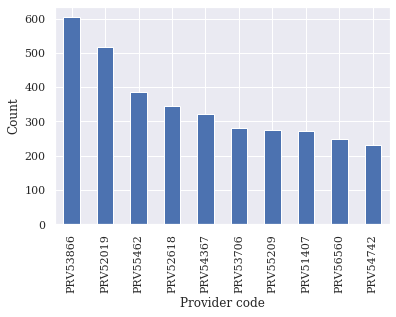

In [26]:
import seaborn as sns
sns.set(font='serif')
plt.figure()
ip_df['Provider'].value_counts().sort_values(ascending=False).head(10).plot.bar()
plt.xlabel('Provider code')
plt.ylabel('Count')


Text(0.5, 0, 'Hospitalization duration')

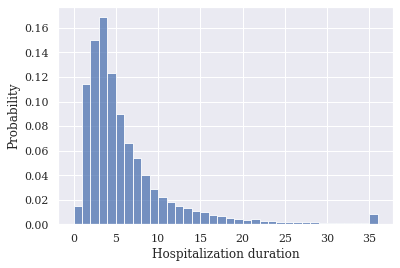

In [27]:

sns.histplot(ip_df['HospitalDuration'].map(lambda x: x.days),bins=range(37),stat='probability')
plt.ylabel('Probability')
plt.xlabel('Hospitalization duration')

Text(0.5, 0, 'Claim duration')

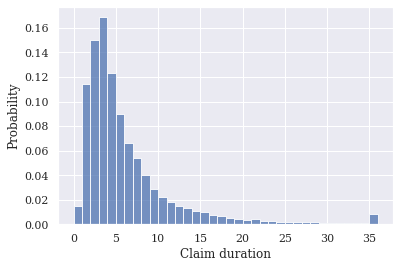

In [28]:

sns.histplot(ip_df['ClaimDuration'].map(lambda x: x.days),bins=range(37),stat='probability')
plt.ylabel('Probability')
plt.xlabel('Claim duration')


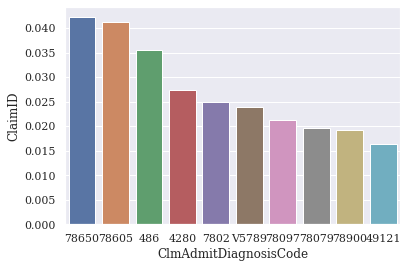

In [29]:
mydf=pd.DataFrame(ip_df.groupby('ClmAdmitDiagnosisCode').
                       ClaimID.count().sort_values(ascending=False)).head(10)
mydf.reset_index(inplace=True)
sns.barplot(x='ClmAdmitDiagnosisCode',y=mydf.ClaimID/50025,
            data=mydf)

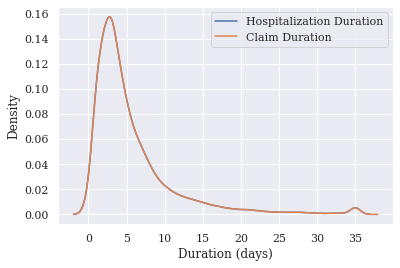

In [30]:
fig, ax = plt.subplots()

sns.kdeplot(ip_df['HospitalDuration'].map(lambda x: x.days),
                                  label = 'Hospitalization Duration', ax=ax)
sns.kdeplot(ip_df['ClaimDuration'].map(lambda x: x.days),
                                  label = 'Claim Duration',ax=ax)
plt.xlabel('Duration (days)')
plt.legend()

Text(0.5, 0, 'Reimbursement from insurnace (dollars)')

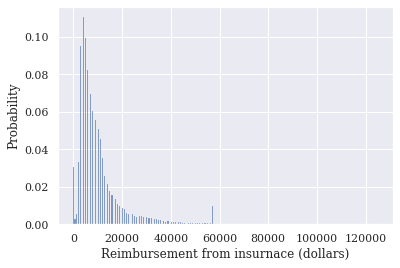

In [31]:
sns.histplot(ip_df['InscClaimAmtReimbursed'],stat='probability')
plt.ylabel('Probability')
plt.xlabel('Reimbursement from insurnace (dollars)')

Text(0.5, 0, 'Paid deductible (dollars)')

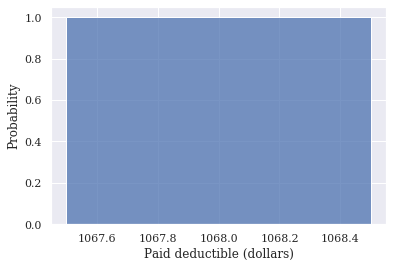

In [32]:
sns.histplot(ip_df['DeductibleAmtPaid'][ip_df.DeductibleAmtPaid>0],stat='probability')
plt.ylabel('Probability')
plt.xlabel('Paid deductible (dollars)')

In [33]:
ip_df['DeductibleAmtPaid']

0        1068.0
1        1068.0
2        1068.0
3        1068.0
4        1068.0
          ...  
50020    1068.0
50021    1068.0
50022    1068.0
50023    1068.0
50024    1068.0
Name: DeductibleAmtPaid, Length: 50025, dtype: float64

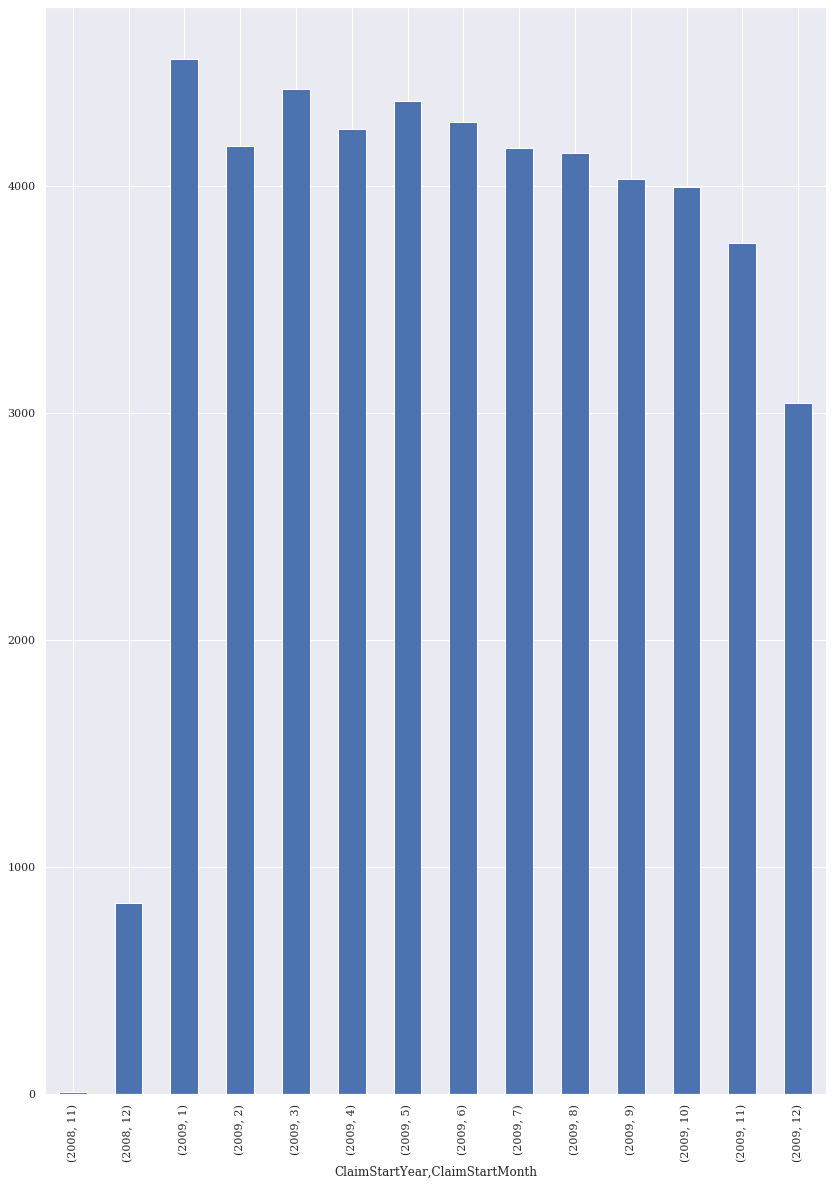

In [41]:

ip_df['ClaimStartMonth'] = ip_df['ClaimStartDt'].map(lambda x: x.month)
ip_df['ClaimStartYear'] = ip_df['ClaimStartDt'].map(lambda x: x.year)
ip_df.groupby(['ClaimStartYear','ClaimStartMonth']).ClaimID.count().plot(kind='bar',figsize=(14,20))

In [37]:
dir(ip_df.ClaimStartDt[1])

['__add__',
 '__class__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__ne__',
 '__new__',
 '__radd__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rsub__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__sub__',
 '__subclasshook__',
 'ctime',
 'day',
 'fromisoformat',
 'fromordinal',
 'fromtimestamp',
 'isocalendar',
 'isoformat',
 'isoweekday',
 'max',
 'min',
 'month',
 'replace',
 'resolution',
 'strftime',
 'timetuple',
 'today',
 'toordinal',
 'weekday',
 'year']

In [46]:
op_test = pd.read_csv("/dataset/Test_Outpatientdata-1542969243754.csv")
op_train = pd.read_csv("/dataset/Train_Outpatientdata-1542865627584.csv")

# Combine test and train set
op_df = pd.concat((op_train, op_test)).reset_index(drop=True)

# Imputing NA values with None (should only be None)
op_df.fillna('None', inplace = True)

# Convert dates into datetime
from datetime import datetime
op_df = op_df.astype(str)
op_df['ClaimStartDt'] = [datetime.strptime(date, '%Y-%m-%d') for date in op_df.ClaimStartDt]
op_df['ClaimEndDt'] = [datetime.strptime(date, '%Y-%m-%d') for date in op_df.ClaimEndDt]
op_df['Claimduration'] = op_df['ClaimEndDt'] - op_df['ClaimStartDt']
op_df['Claimduration'] = op_df['Claimduration'].map(lambda x: x.days)

# Make a column called month for the month of claim
op_df['ClaimMonth'] = op_df['ClaimStartDt'].map(lambda x: x.month)

# Change Dollar amount to float type
op_df['InscClaimAmtReimbursed'] = op_df['InscClaimAmtReimbursed'].astype(float)
op_df['DeductibleAmtPaid'] = op_df['DeductibleAmtPaid'].astype(float)


FileNotFoundError: [Errno 2] File /dataset/Test_Outpatientdata-1542969243754.csv does not exist: '/dataset/Test_Outpatientdata-1542969243754.csv'